In [1]:
import tensorflow as tf

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
img_index = 1000
print(y_train[img_index])

0


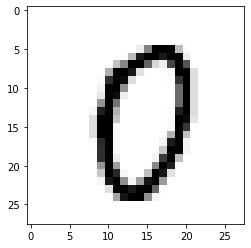

In [5]:
plt.imshow(X_train[img_index], cmap = 'Greys')
plt.show()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# Reshaping the arrays to 4-dims so that it can work with keras API
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
input_shape = (28,28,1)

In [8]:
# Making sure that the values are float so that we get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
# Normalizing the RGB codes by dividing it with max RGB value
X_train /= 255
X_test /= 255

In [10]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [13]:
# Using sequential model from keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [15]:
# Creating a sequential model and adding the layers
model = Sequential()
model.add(Conv2D(28,kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
# Flattening the 2D array for a fully connected layers
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

In [16]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2112 - accuracy: 0.9354
Epoch 2/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0864 - accuracy: 0.9733
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0612 - accuracy: 0.9805
Epoch 4/10
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0457 - accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0372 - accuracy: 0.9882
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0297 - accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0248 - accuracy: 0.9917
Epoch 8/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0222 - accuracy: 0.9922
Epoch 9/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 10/10
60000/60000 [==============================

In [17]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 5s 538us/step


[0.0584944800890758, 0.9865000247955322]

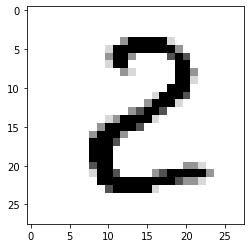

The predicted number is:  2


In [23]:
# Output of one of our test set
image_index = 2110
plt.imshow(X_test[image_index].reshape(28,28), cmap = 'Greys')
plt.show()
pred = model.predict(X_test[image_index].reshape(1,28, 28, 1))
print("The predicted number is: ",pred.argmax())